In [1]:
from Genome.goldstandard_pair.lls import *
gd = '/home/hermuba/data0118/goldstandard/gosim.smpl'
net = '/home/hermuba/data0118/mutual_info/eskape_blastp_out_max_evalue_pivot_new_ordinary40_mutual' #ID has problem
gold = read_gold(gd, colnames = ['gene_one', 'gene_two', 'gosim'])
all_chunks = read_net_by_chunk(net)
all_chunk = merge_net_with_all_chunks(gold,all_chunks, 'eskape')

Index(['gene_one', 'gene_two', 'gosim', 'mutual_info', 'nrm_mutual'], dtype='object') (22, 5)
Index(['gene_one', 'gene_two', 'gosim', 'mutual_info', 'nrm_mutual'], dtype='object') (22, 5)
Index(['gene_one', 'gene_two', 'gosim', 'mutual_info', 'nrm_mutual'], dtype='object') (17, 5)
Index(['gene_one', 'gene_two', 'gosim', 'mutual_info', 'nrm_mutual'], dtype='object') (13, 5)
Index(['gene_one', 'gene_two', 'gosim', 'mutual_info', 'nrm_mutual'], dtype='object') (26, 5)
Index(['gene_one', 'gene_two', 'gosim', 'mutual_info', 'nrm_mutual'], dtype='object') (19, 5)
Index(['gene_one', 'gene_two', 'gosim', 'mutual_info', 'nrm_mutual'], dtype='object') (15, 5)
Index(['gene_one', 'gene_two', 'gosim', 'mutual_info', 'nrm_mutual'], dtype='object') (22, 5)
Index(['gene_one', 'gene_two', 'gosim', 'mutual_info', 'nrm_mutual'], dtype='object') (15, 5)
Index(['gene_one', 'gene_two', 'gosim', 'mutual_info', 'nrm_mutual'], dtype='object') (14, 5)
Index(['gene_one', 'gene_two', 'gosim', 'mutual_info', 'nrm_

In [2]:
all_chunk

,gene_one,gene_two,gosim,mutual_info,nrm_mutual
0,562.22861.con.0021_43|562.22861,JMUY01000002_643|1438670.3,0.000,0.049859,0.065742
1,562.23090.con.0007_144|562.23090,562.23407.con.0023_14|562.23407,1.000,0.191147,0.139850
2,562.23429.con.0026_46|562.23429,562.23864.con.0056_27|562.23864,0.072,0.025271,0.039452
3,562.23429.con.0026_46|562.23429,JMUY01000006_262|1438670.3,0.125,0.140477,0.156382
4,562.23473.con.0031_49|562.23473,FLWH01000017_47|562.12962,0.048,0.948073,0.676530
...,...,...,...,...,...
0,562.22661.con.0013_7|562.22661,JMUY01000002_262|1438670.3,0.097,1.028261,0.867551
1,562.23404.con.0071_2|562.23404,562.23864.con.0081_20|562.23864,0.360,0.002336,0.020510
0,562.22453.con.0094_5|562.22453,562.22909.con.0002_338|562.22909,0.083,0.065077,0.083002
1,562.23555.con.0070_2|562.23555,562.23583.con.0081_4|562.23583,0.367,0.010684,0.049773


In [4]:
all_chunk.head()

,gene_one,gene_two,gosim,mutual_info,nrm_mutual
0,562.22861.con.0021_43|562.22861,JMUY01000002_643|1438670.3,0.000,0.049859,0.065742
1,562.23090.con.0007_144|562.23090,562.23407.con.0023_14|562.23407,1.000,0.191147,0.139850
2,562.23429.con.0026_46|562.23429,562.23864.con.0056_27|562.23864,0.072,0.025271,0.039452
3,562.23429.con.0026_46|562.23429,JMUY01000006_262|1438670.3,0.125,0.140477,0.156382
4,562.23473.con.0031_49|562.23473,FLWH01000017_47|562.12962,0.048,0.948073,0.676530


In [5]:
all_chunk.to_csv('~/data0118/joined_smpl/eskape_GOsim_rm_plasmid', index = False)

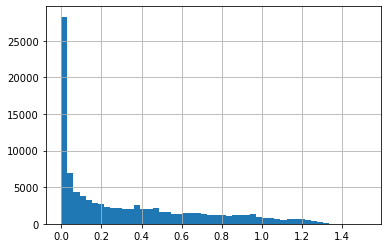

In [15]:
all_chunk['mutual_info'].hist( bins = 50)

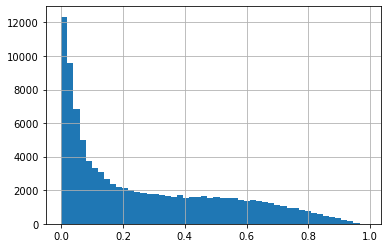

In [16]:
all_chunk['nrm_mutual'].hist( bins = 50)

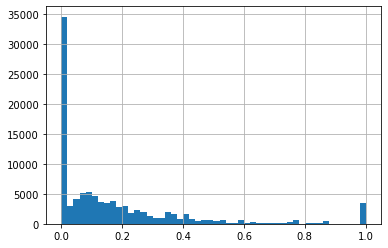

In [17]:
all_chunk['gosim'].hist( bins = 50)

Text(0.5, 0.98, 'EskapeNet v.s. GO term semantic similarity score')

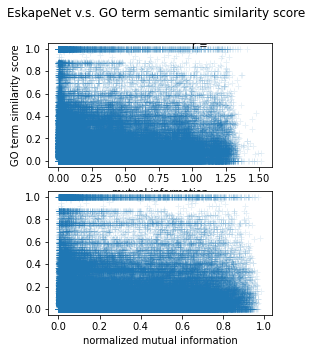

In [12]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(2,1, sharey = True, figsize = (4,5))
ax[0].plot(all_chunk['mutual_info'], all_chunk['gosim'], '+', alpha = 0.1)
ax[0].set_xlabel('mutual information')
ax[0].set_ylabel('GO term similarity score')
ax[0].text(1,1,'r = ')
ax[1].plot(all_chunk['nrm_mutual'], all_chunk['gosim'], '+' ,  alpha = 0.1)
ax[1].set_xlabel('normalized mutual information')
plt.suptitle('EskapeNet v.s. GO term semantic similarity score')


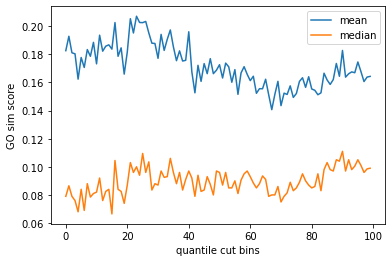

In [27]:
score = 'nrm_mutual'
all_chunk['cut_mutual'] = pd.qcut(all_chunk[score],  q = 100, duplicates = 'drop', labels = False)
grouped_mean = all_chunk.groupby(by = ['cut_mutual'])['gosim'].mean()
grouped_median = all_chunk.groupby(by = ['cut_mutual'])['gosim'].median()

grouped_mean.plot(label = 'mean')
grouped_median.plot(label = 'median')
plt.ylabel('GO sim score')
plt.xlabel('quantile cut bins')
plt.legend()

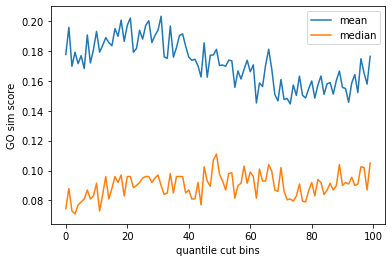

In [28]:
score = 'mutual_info'
all_chunk['cut_mutual'] = pd.qcut(all_chunk[score],  q = 100, duplicates = 'drop', labels = False)
grouped_mean = all_chunk.groupby(by = ['cut_mutual'])['gosim'].mean()
grouped_median = all_chunk.groupby(by = ['cut_mutual'])['gosim'].median()

grouped_mean.plot(label = 'mean')
grouped_median.plot(label = 'median')
plt.ylabel('GO sim score')
plt.xlabel('quantile cut bins')
plt.legend()